<a href="https://colab.research.google.com/github/rpasquini/econometria/blob/main/Valor_esperado_y_Varianza_de_MCO_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipykernel_6743/2514566205.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_estimates.append(model.params[0])
/tmp/ipykernel_6743/2514566205.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_estimates.append(model.params[1])
/tmp/ipykernel_6743/2514566205.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_estimates.append(model.params[0])
/tmp/ipykernel_6743/2514566205.py:34: FutureWarning: Series.__ge

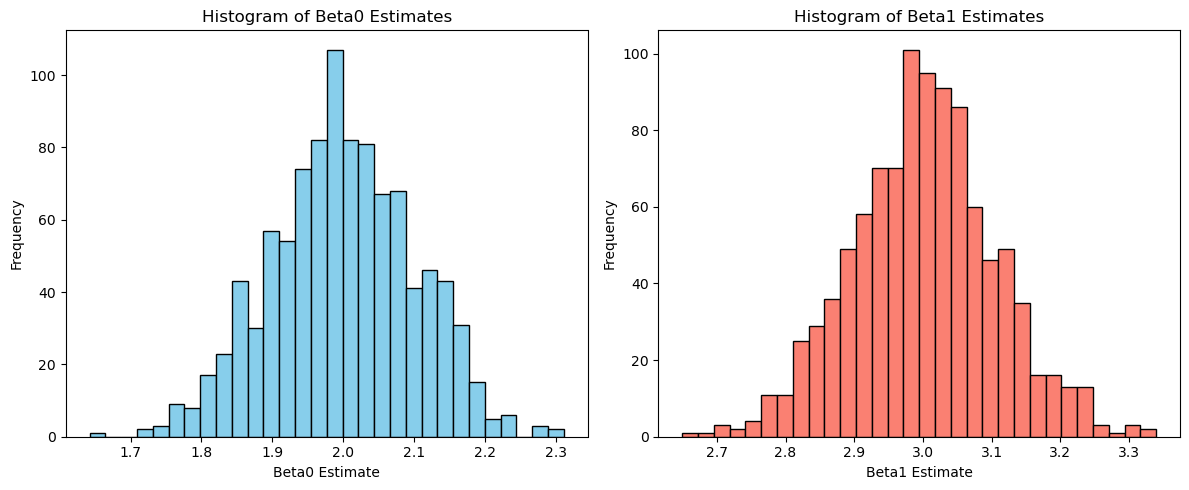

Descriptive statistics for Beta0:
Mean: 1.9988185878624452
Standard Deviation: 0.1010527943544498

Descriptive statistics for Beta1:
Mean: 3.0013696480516883
Standard Deviation: 0.10507094582506453


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parametros asumidos
num_simulations = 1000
true_beta0 = 2
true_beta1 = 3
sample_size = 100

# Listas de coeficientes estimados
beta0_estimates = []
beta1_estimates = []

# Perform simulations
for _ in range(num_simulations):
    # Simulate data
    x = np.random.randn(sample_size)
    epsilon = np.random.randn(sample_size)
    y = true_beta0 + true_beta1 * x + epsilon

    # Convert to DataFrame
    df = pd.DataFrame({'x': x, 'y': y})

    # Fit OLS model
    model = sm.OLS(df['y'], sm.add_constant(df['x'])).fit()

    # Store estimated coefficients
    beta0_estimates.append(model.params[0])
    beta1_estimates.append(model.params[1])

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(beta0_estimates, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Beta0 Estimates')
axs[0].set_xlabel('Beta0 Estimate')
axs[0].set_ylabel('Frequency')

axs[1].hist(beta1_estimates, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Beta1 Estimates')
axs[1].set_xlabel('Beta1 Estimate')
axs[1].set_ylabel('Frequency')
plt.savefig('../slides/regresion/histograms.png')
plt.tight_layout()
plt.show()


# Compute descriptive statistics
beta0_mean = np.mean(beta0_estimates)
beta0_std = np.std(beta0_estimates)
beta1_mean = np.mean(beta1_estimates)
beta1_std = np.std(beta1_estimates)

print("Descriptive statistics for Beta0:")
print(f"Mean: {beta0_mean}")
print(f"Standard Deviation: {beta0_std}")

print("\nDescriptive statistics for Beta1:")
print(f"Mean: {beta1_mean}")
print(f"Standard Deviation: {beta1_std}")
